In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as MPL
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csgraph
from scipy.sparse.csgraph import laplacian
from numpy.linalg import eig
import copy

In [60]:
G = nx.Graph()

G.add_edge("1", "2", weight=1)
G.add_edge("1", "3", weight=1)
G.add_edge("2", "3", weight=1)
G.add_edge("2", "4", weight=10)
G.add_edge("3", "4", weight=1)
G.add_edge("4", "5", weight=10)
G.add_edge("4", "6", weight=10)
G.add_edge("5", "6", weight=100)

In [73]:
G.number_of_edges()

8

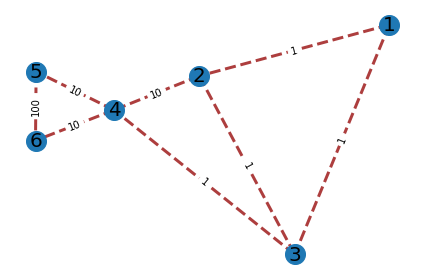

In [62]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 100]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 100]
pos = nx.spring_layout(G, seed=30)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=400)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.9, edge_color="brown", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [63]:
#adjacency matrix
A = nx.adjacency_matrix(G).todense()
A


matrix([[  0,   1,   1,   0,   0,   0],
        [  1,   0,   1,  10,   0,   0],
        [  1,   1,   0,   1,   0,   0],
        [  0,  10,   1,   0,  10,  10],
        [  0,   0,   0,  10,   0, 100],
        [  0,   0,   0,  10, 100,   0]], dtype=int32)

In [64]:
#laplacian matrix
L = np.array((nx.laplacian_matrix(G).todense()))
print(L)

[[   2   -1   -1    0    0    0]
 [  -1   12   -1  -10    0    0]
 [  -1   -1    3   -1    0    0]
 [   0  -10   -1   31  -10  -10]
 [   0    0    0  -10  110 -100]
 [   0    0    0  -10 -100  110]]


In [65]:
#eigenvalue and eigenvectors of laplacian matrix
w,u=eig(L)
print('E-value:', w)
print('---------------')
print('---------------')
print('E-vector', u)

E-value: [ 4.09356517e+01  1.15434559e+01 -3.28410398e-15  3.70408710e+00
  1.81680523e+00  2.10000000e+02]
---------------
---------------
E-vector [[ 8.08421823e-03  7.85965689e-02 -4.08248290e-01  4.73623409e-01
   7.76383555e-01  3.94326874e-23]
 [-2.99578944e-01 -8.46542708e-01 -4.08248290e-01  5.00160981e-02
  -1.56363755e-01  5.05172316e-17]
 [-1.51853616e-02  9.64598151e-02 -4.08248290e-01 -8.57111641e-01
   2.98593164e-01 -5.05254336e-17]
 [ 8.67561313e-01 -5.61540424e-02 -4.08248290e-01  7.98417424e-02
  -2.66725929e-01  4.14873656e-17]
 [-2.80440613e-01  3.63820183e-01 -4.08248290e-01  1.26815195e-01
  -3.25943518e-01 -7.07106781e-01]
 [-2.80440613e-01  3.63820183e-01 -4.08248290e-01  1.26815195e-01
  -3.25943518e-01  7.07106781e-01]]


In [69]:
print(w)
print('---------')
print(np.argmin(w)) #zero eigenvalue

[ 4.09356517e+01  1.15434559e+01 -3.28410398e-15  3.70408710e+00
  1.81680523e+00  2.10000000e+02]
---------
2


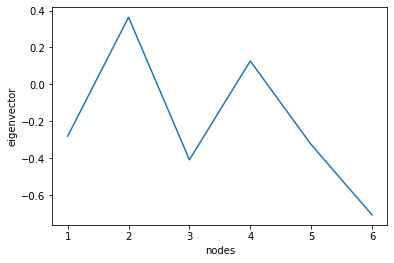

In [70]:
w2 =copy.copy(w)

w2[np.argmin(w2)]= np.inf #because I wanted to find the second smallest eigenvalue(smallest non-zero)
plt.plot(u[np.argmin(w2)])

plt.xlabel('nodes')
plt.ylabel('eigenvector')
plt.xticks(range(6),[1,2,3,4,5,6])
plt.show()

In [71]:
#normalized laplacian
Ls = np.array((nx.normalized_laplacian_matrix(G).todense()))
print(Ls)

[[ 1.         -0.20412415 -0.40824829  0.          0.          0.        ]
 [-0.20412415  1.         -0.16666667 -0.51847585  0.          0.        ]
 [-0.40824829 -0.16666667  1.         -0.10369517  0.          0.        ]
 [ 0.         -0.51847585 -0.10369517  1.         -0.17124694 -0.17124694]
 [ 0.          0.          0.         -0.17124694  1.         -0.90909091]
 [ 0.          0.          0.         -0.17124694 -0.90909091  1.        ]]


In [72]:
#eigenvalue and eigenvectors
ws,us=eig(Ls)
print('E-value:', ws)
print('---------------')
print('---------------')
print('E-vector', us)

E-value: [ 1.58436335e+00  1.38269942e+00  7.89242687e-01  3.34603634e-01
 -1.31510696e-16  1.90909091e+00]
---------------
---------------
E-vector [[ 3.46655342e-01 -6.04359650e-01 -5.44703506e-01 -4.58710029e-01
  -8.63868426e-02 -6.76478382e-18]
 [-6.47044870e-01 -2.85334605e-01  3.97439070e-01 -5.45145087e-01
  -2.11603685e-01  1.14486746e-16]
 [-1.72677264e-01  7.09205094e-01 -4.79921563e-01 -4.75070479e-01
  -1.05801842e-01 -4.21794925e-17]
 [ 6.48300457e-01  2.20571383e-01  5.30279774e-01 -3.66314757e-01
  -3.40105339e-01 -7.11108044e-17]
 [-7.43373733e-02 -2.92401738e-02 -1.30036400e-01  2.57413560e-01
  -6.40661971e-01 -7.07106781e-01]
 [-7.43373733e-02 -2.92401738e-02 -1.30036400e-01  2.57413560e-01
  -6.40661971e-01  7.07106781e-01]]


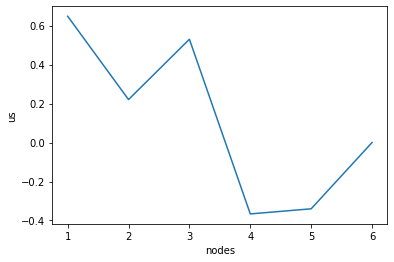

In [58]:
ws2 =copy.copy(ws)

ws2[np.argmin(ws2)]= np.inf
plt.plot(us[np.argmin(ws2)])
plt.xlabel('nodes')
plt.ylabel('us')
plt.xticks(range(6),[1,2,3,4,5,6])
plt.show()

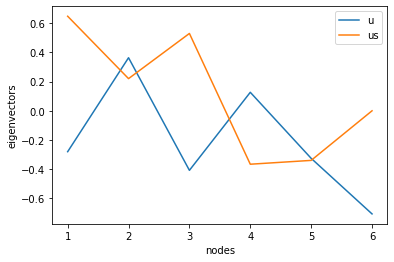

In [57]:
w2 =copy.copy(w)
ws2 =copy.copy(ws)

w2[np.argmin(w2)]= np.inf
plt.plot(u[np.argmin(w2)],label='u')

ws2[np.argmin(ws2)]= np.inf
plt.plot(us[np.argmin(ws2)],label='us')
plt.xlabel('nodes')
plt.ylabel('eigenvectors')
plt.xticks(range(6),[1,2,3,4,5,6])
plt.legend()
plt.show()